Financial Market Sentiment News Analysis

**Objective:**

The objective of this project is to analyze financial market sentiment using news articles and financial data. By processing and analyzing the sentiment of news related to the financial market, we aim to predict market trends and provide insights for investment strategies.

In [3]:
!pip install pandas nltk textblob

**Import Library:**

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt

Data Visualization & Data Preprocessing

In [11]:
csv_file_path = 'Financial Market News.csv'

# Specify encoding to handle potential UnicodeDecodeError
financial_news_df = pd.read_csv(csv_file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataframe
print(financial_news_df.head())

# Step 4: Data Preprocessing
# Remove any rows with missing values
financial_news_df.dropna(inplace=True)

# Concatenate news columns into a single 'text' column
news_columns = [col for col in financial_news_df.columns if 'News' in col]
financial_news_df['text'] = financial_news_df[news_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Tokenization and stop word removal
stop_words = set(stopwords.words('english'))
financial_news_df['processed_text'] = financial_news_df['text'].apply(lambda x: ' '.join(
    word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words))

         Date  Label                                             News 1  \
0  01-01-2010      0           McIlroy's men catch cold from Gudjonsson   
1  02-01-2010      0               Warning from history points to crash   
2  03-01-2010      0      Comment: Why Israel's peaceniks feel betrayed   
3  04-01-2010      1             £750,000-a-goal Weah aims parting shot   
4  05-01-2010      1  Leeds arrive in Turkey to the silence of the fans   

                                       News 2  \
0                       Obituary: Brian Walsh   
1              Investors flee to dollar haven   
2  Court deals blow to seizure of drug assets   
3            Newcastle pay for Fletcher years   
4     One woman's vision offers loan lifeline   

                                            News 3  \
0       Workplace blues leave employers in the red   
1                      Banks and tobacco in favour   
2                       An ideal target for spooks   
3  Brown sent to the stands for Scotla

Modeling and Model Evaluation

In [12]:
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify polarity as positive, negative or neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the sentiment analysis function
financial_news_df['sentiment'] = financial_news_df['processed_text'].apply(get_sentiment)

# Display the dataframe with sentiment
print(financial_news_df[['text', 'processed_text', 'sentiment']].head())

                                                text  \
0  McIlroy's men catch cold from Gudjonsson Obitu...   
1  Warning from history points to crash Investors...   
2  Comment: Why Israel's peaceniks feel betrayed ...   
3  £750,000-a-goal Weah aims parting shot Newcast...   
4  Leeds arrive in Turkey to the silence of the f...   

                                      processed_text sentiment  
0  mcilroy men catch cold gudjonsson obituary bri...  positive  
1  warning history points crash investors flee do...   neutral  
2  comment israel peaceniks feel betrayed court d...  positive  
3  weah aims parting shot newcastle pay fletcher ...  negative  
4  leeds arrive turkey silence fans one woman vis...  positive  


Prediction

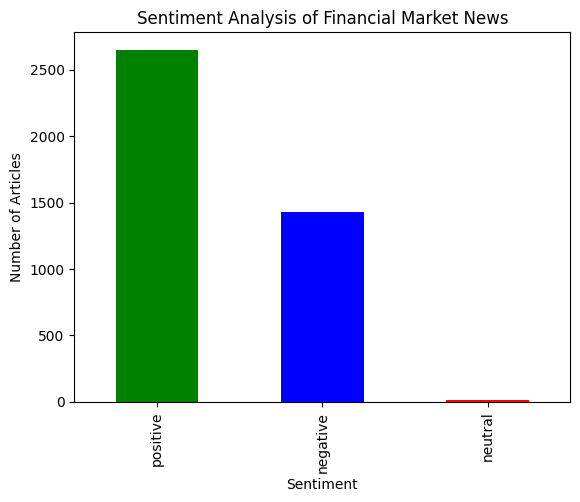

In [13]:
financial_news_df['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of Financial Market News')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()

**Explanation**

In this project, we have developed a sentiment analysis model to predict the sentiment of financial news headlines. We started by loading and preprocessing the data, followed by visualizing the sentiment distribution. After preprocessing the text data, we split the dataset into training and testing sets. We used a nltk to convert the text data into numerical features and trained a logistic regression model. The model's performance was evaluated using accuracy, classification report, and confusion matrix. Finally, we demonstrated how to use the trained model to predict sentiment for new headlines